In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Taken from https://jwalton.info/Embed-Publication-Matplotlib-Latex/
tex_width = 345

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)

In [3]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [4]:
df = pd.concat(
    [pd.read_csv("results_Hopper-v3_2.csv", sep=","), pd.read_csv("results_Walker2d-v3.csv", sep=",")]
)

In [5]:
df.head()

,Name,Tags,Runtime,Created,Notes,State,alpha,env,learning_rate,timesteps,...,train/models[0]/scale-norm,train/nll,train/nll_weight,train/vae,val/loss,val/models[0]/loc-norm,val/models[0]/scale-norm,val/nll,val/nll_weight,val/vae
0,lemon-rain-1096,"exp1, new loss",5009,2020-10-09T03:58:59.000Z,-,finished,1.000,Hopper-v3,0.001,194000,...,0.810341,-4.952310e+01,1.000,581.562012,-49.538399,2.079235,0.786786,-4.953840e+01,1.000,471.758209
1,comic-cosmos-1095,"exp1, new loss",5582,2020-10-09T03:47:03.000Z,-,finished,0.000,Hopper-v3,0.001,194000,...,1.326607,4.182528e+12,0.000,7.542817,8.673162,9.587096,1.332445,2.081999e+12,0.000,8.673162
2,glorious-flower-1097,"exp1, new loss",3510,2020-10-09T04:54:01.000Z,-,finished,0.001,Hopper-v3,0.001,194000,...,1.323776,2.692851e+02,0.001,6.239023,9.899045,4.637823,1.333704,2.488859e+02,0.001,9.659820
3,robust-violet-1094,"exp1, new loss",6998,2020-10-09T03:22:22.000Z,-,finished,0.001,Hopper-v3,0.001,184000,...,0.716096,7.106795e+01,0.001,3.593613,3.358828,1.105853,0.702968,6.156160e+01,0.001,3.300568
4,exalted-thunder-1093,"exp1, new loss",2318,2020-10-09T03:20:17.000Z,-,finished,1.000,Hopper-v3,0.001,184000,...,0.902499,-4.662854e+01,1.000,1004.764832,-45.294693,2.092493,0.927648,-4.529469e+01,1.000,1205.608154


In [6]:
df.dtypes

Name                           object
Tags                           object
Runtime                         int64
Created                        object
Notes                          object
State                          object
alpha                         float64
env                            object
learning_rate                 float64
timesteps                       int64
weight_decay                    int64
epoch                           int64
global_step                     int64
test/loss                     float64
test/models[0]/loc-norm       float64
test/models[0]/scale-norm     float64
test/nll                      float64
test/nll_weight               float64
test/vae                      float64
train/loss                    float64
train/models[0]/loc-norm      float64
train/models[0]/scale-norm    float64
train/nll                     float64
train/nll_weight              float64
train/vae                     float64
val/loss                      float64
val/models[0

In [7]:
df = df.sort_values("timesteps")
df.head()

,Name,Tags,Runtime,Created,Notes,State,alpha,env,learning_rate,timesteps,...,train/models[0]/scale-norm,train/nll,train/nll_weight,train/vae,val/loss,val/models[0]/loc-norm,val/models[0]/scale-norm,val/nll,val/nll_weight,val/vae
59,sleek-oath-1032,"exp1, new loss",942,2020-10-08T13:27:37.000Z,-,finished,0.001,Hopper-v3,0.001,14000,...,1.454104,4.951322e+02,0.001,4.180259,5.407732,7.359320,1.494642,4.781421e+02,0.001,4.934524
53,astral-fog-978,"exp1, new loss",282,2020-10-07T18:20:40.000Z,-,finished,1.000,Walker2d-v3,0.001,14000,...,18.613997,-1.373791e+01,1.000,11.553823,-13.614246,20.588783,18.378325,-1.361425e+01,1.000,10.646608
61,cerulean-fog-1032,"exp1, new loss",1224,2020-10-08T13:27:37.000Z,-,finished,0.000,Hopper-v3,0.001,14000,...,0.572472,6.726375e+12,0.000,2.793547,4.969597,10.356400,0.561883,1.781066e+12,0.000,4.969597
60,icy-vortex-1032,"exp1, new loss",173,2020-10-08T13:27:37.000Z,-,finished,1.000,Hopper-v3,0.001,14000,...,1.016007,-2.979617e+01,1.000,2.897025,-28.480890,2.485849,1.138033,-2.848089e+01,1.000,2.982871
55,fanciful-bird-975,"exp1, new loss",309,2020-10-07T18:20:38.000Z,-,finished,0.000,Walker2d-v3,0.001,14000,...,4.869668,9.357673e+04,0.000,7.032399,10.256441,4.444019,4.576911,1.050253e+05,0.000,10.256441


In [8]:
def model_learning_cats(series):
    dmap = {1.0: "mle", 0.0: "vaml", 0.001: "reg-vaml"}
    return series.map(dmap).astype(str)

In [9]:
df["model learning"] = model_learning_cats(df["alpha"])
df.head()

,Name,Tags,Runtime,Created,Notes,State,alpha,env,learning_rate,timesteps,...,train/nll,train/nll_weight,train/vae,val/loss,val/models[0]/loc-norm,val/models[0]/scale-norm,val/nll,val/nll_weight,val/vae,model learning
59,sleek-oath-1032,"exp1, new loss",942,2020-10-08T13:27:37.000Z,-,finished,0.001,Hopper-v3,0.001,14000,...,4.951322e+02,0.001,4.180259,5.407732,7.359320,1.494642,4.781421e+02,0.001,4.934524,reg-vaml
53,astral-fog-978,"exp1, new loss",282,2020-10-07T18:20:40.000Z,-,finished,1.000,Walker2d-v3,0.001,14000,...,-1.373791e+01,1.000,11.553823,-13.614246,20.588783,18.378325,-1.361425e+01,1.000,10.646608,mle
61,cerulean-fog-1032,"exp1, new loss",1224,2020-10-08T13:27:37.000Z,-,finished,0.000,Hopper-v3,0.001,14000,...,6.726375e+12,0.000,2.793547,4.969597,10.356400,0.561883,1.781066e+12,0.000,4.969597,vaml
60,icy-vortex-1032,"exp1, new loss",173,2020-10-08T13:27:37.000Z,-,finished,1.000,Hopper-v3,0.001,14000,...,-2.979617e+01,1.000,2.897025,-28.480890,2.485849,1.138033,-2.848089e+01,1.000,2.982871,mle
55,fanciful-bird-975,"exp1, new loss",309,2020-10-07T18:20:38.000Z,-,finished,0.000,Walker2d-v3,0.001,14000,...,9.357673e+04,0.000,7.032399,10.256441,4.444019,4.576911,1.050253e+05,0.000,10.256441,vaml


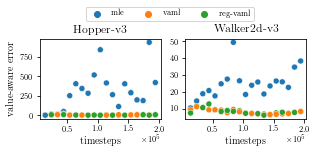

In [44]:
_, axes = plt.subplots(ncols=2, figsize=set_size(tex_width, subplots=(1, 2)))

hue_order = ["mle", "vaml", "reg-vaml"]
kwargs = dict(x="timesteps", y="test/vae", hue="model learning", hue_order=hue_order)

ax = axes[0]
sns.scatterplot(ax=ax, data=df[df["env"] == "Hopper-v3"], **kwargs)
ax.set_title("Hopper-v3")
ax.ticklabel_format(axis="x", style="sci", scilimits=(0, 0))
ax.set_ylabel("value-aware error")
ax.get_legend().remove()

ax = axes[1]
sns.scatterplot(ax=ax, data=df[df["env"] == "Walker2d-v3"], **kwargs)
ax.set_title("Walker2d-v3")
ax.ticklabel_format(axis="x", style="sci", scilimits=(0, 0))
ax.set_ylabel(None)
ax.get_legend().remove()

ax = axes[0]
ax.legend(bbox_to_anchor=(1.8, 1.45), ncol=3)

# ax = axes[0]
# ax.text(0, 1000, "loss")


# plt.tight_layout()
plt.savefig("output.pdf", bbox_inches="tight")

In [17]:
ax.get_legend().get_title()

Text(0, 0, 'model learning')